<h1 align="center" style="font-family:Georgia; font-size:40px;">
📘 Capstone Project <br> <br>
<strong>Employee Retention Prediction</strong> <br>
<em>by Goutham</em>
</h1>



![Employee](https://images.unsplash.com/photo-1521737604893-d14cc237f11d)






# 📑 Table of Contents




1. [Problem Statement](#1-problem-statement)
2. [Project Objective](#2-project-objective)
3. [Dataset Description](#3-dataset-description)
4. [Import Required Libraries](#4-import-required-libraries)
5. [Load the Dataset](#5-load-the-dataset)
6. [Initial Data Inspection](#6-initial-data-inspection)
7. [Data Types & Feature Categorization](#7-data-types--feature-categorization)
8. [Target Variable Analysis](#8-target-variable-analysis)
9. [Missing Value Analysis](#9-missing-value-analysis)
10. [Numerical Feature Summary](#10-numerical-feature-summary)
11. [Exploratory Data Analysis (EDA)](#11-exploratory-data-analysis-eda)
12. [Feature Encoding](#12-feature-encoding)
13. [Feature–Target Split](#13-feature–target-split)
14. [Train–Validation Split](#14-train–validation-split)
15. [Model Evaluation Function](#15-model-evaluation-function)
16. [Model Training](#16-model-training)
17. [Model Comparison](#17-model-comparison)
18. [Hyperparameter Tuning (XGBoost)](#18-hyperparameter-tuning-xgboost)
19. [Final Tuned Model Evaluation](#19-final-tuned-model-evaluation)
20. [Apply SMOTE (Training Data Only)](#20-apply-smote-training-data-only)
21. [Retrain Models Using SMOTE Data](#21-retrain-models-using-smote-data)
22. [Evaluate SMOTE Models (Same Validation Set)](#22-evaluate-smote-models-same-validation-set)
23. [Compare Before vs After SMOTE](#23-compare-before-vs-after-smote)
24. [Final Conclusion ](#24-final-conclusion-)


<span style="color:green"><h2 id="1-problem-statement">1. Problem Statement</h2></span>




Employee attrition is a critical challenge for organizations, especially in highly competitive roles such as data science. High turnover leads to increased recruitment costs, loss of organizational knowledge, and reduced productivity.

Goal:
Predict whether a data scientist is likely to look for a job change using machine learning.

<span style="color:green"><h2 id="2-project-objective">2. Project Objective</h2></span>


To analyze employee-related data and identify key factors influencing employee attrition and retention.

To perform Exploratory Data Analysis (EDA) to understand patterns, trends, and relationships within the workforce data.

To preprocess the dataset by handling missing values, encoding categorical variables, and scaling numerical features.

To build and compare machine learning classification models to predict whether an employee is likely to stay or leave the organization.

To evaluate model performance using metrics such as Accuracy, Precision, Recall, and F1-Score.

To identify the most important features contributing to employee attrition for better HR decision-making.

To provide data-driven insights that help organizations reduce employee turnover and improve retention strategies.

To develop a solution that can support HR analytics and workforce planning.

<span style="color:green"><h2 id="3-dataset-description">3. Dataset Description</h2></span>


The dataset contains demographic, educational, and professional attributes of data scientists.
Each row represents an employee, and the target variable indicates job change intention.

<span style="color:green"><h2 id="4-import-required-libraries">4. Import Required Libraries</h2></span>


In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


<span style="color:green"><h2 id="5-load-the-dataset">5. Load the Dataset</h2></span>


In [ ]:
train_df = pd.read_csv("aug_train.csv")
test_df  = pd.read_csv("aug_test.csv")


<span style="color:green"><h2 id="6-initial-data-inspection">6. Initial Data Inspection</h2></span>


In [40]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()
test_df.head()


Train shape: (19158, 14)
Test shape: (2129, 13)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


<span style="color:green"><h2 id="7-data-types--feature-categorization">7. Data Types & Feature Categorization</h2></span>


In [41]:
train_df.info()
test_df.info()

num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

print("Numerical features:", len(num_cols))
print("Categorical features:", len(cat_cols))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<span style="color:green"><h2 id="8-target-variable-analysis">8. Target Variable Analysis</h2></span>


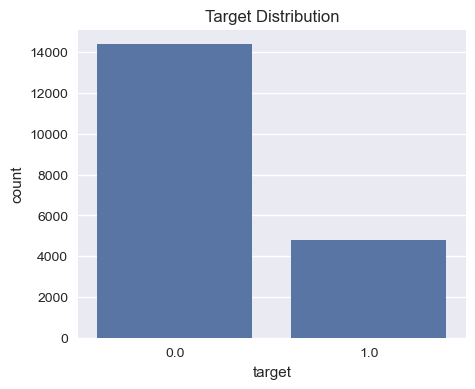

In [42]:
train_df['target'].value_counts()
train_df['target'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,4))
sns.countplot(x='target', data=train_df)
plt.title("Target Distribution")
plt.show()


<span style="color:green"><h2 id="9-missing-value-analysis">9. Missing Value Analysis</h2></span>


In [43]:
missing_count = train_df.isnull().sum()
missing_percent = (missing_count / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing %
company_type,6140,32.049274
company_size,5938,30.994885
gender,4508,23.530640
major_discipline,2813,14.683161
education_level,460,2.401086
last_new_job,423,2.207955
enrolled_university,386,2.014824
experience,65,0.339284


<span style="color:green"><h2 id="10-numerical-feature-summary">10. Numerical Feature Summary</h2></span>


In [44]:
train_df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


<span style="color:green"><h2 id="11-exploratory-data-analysis-eda">11. Exploratory Data Analysis (EDA)</h2></span>


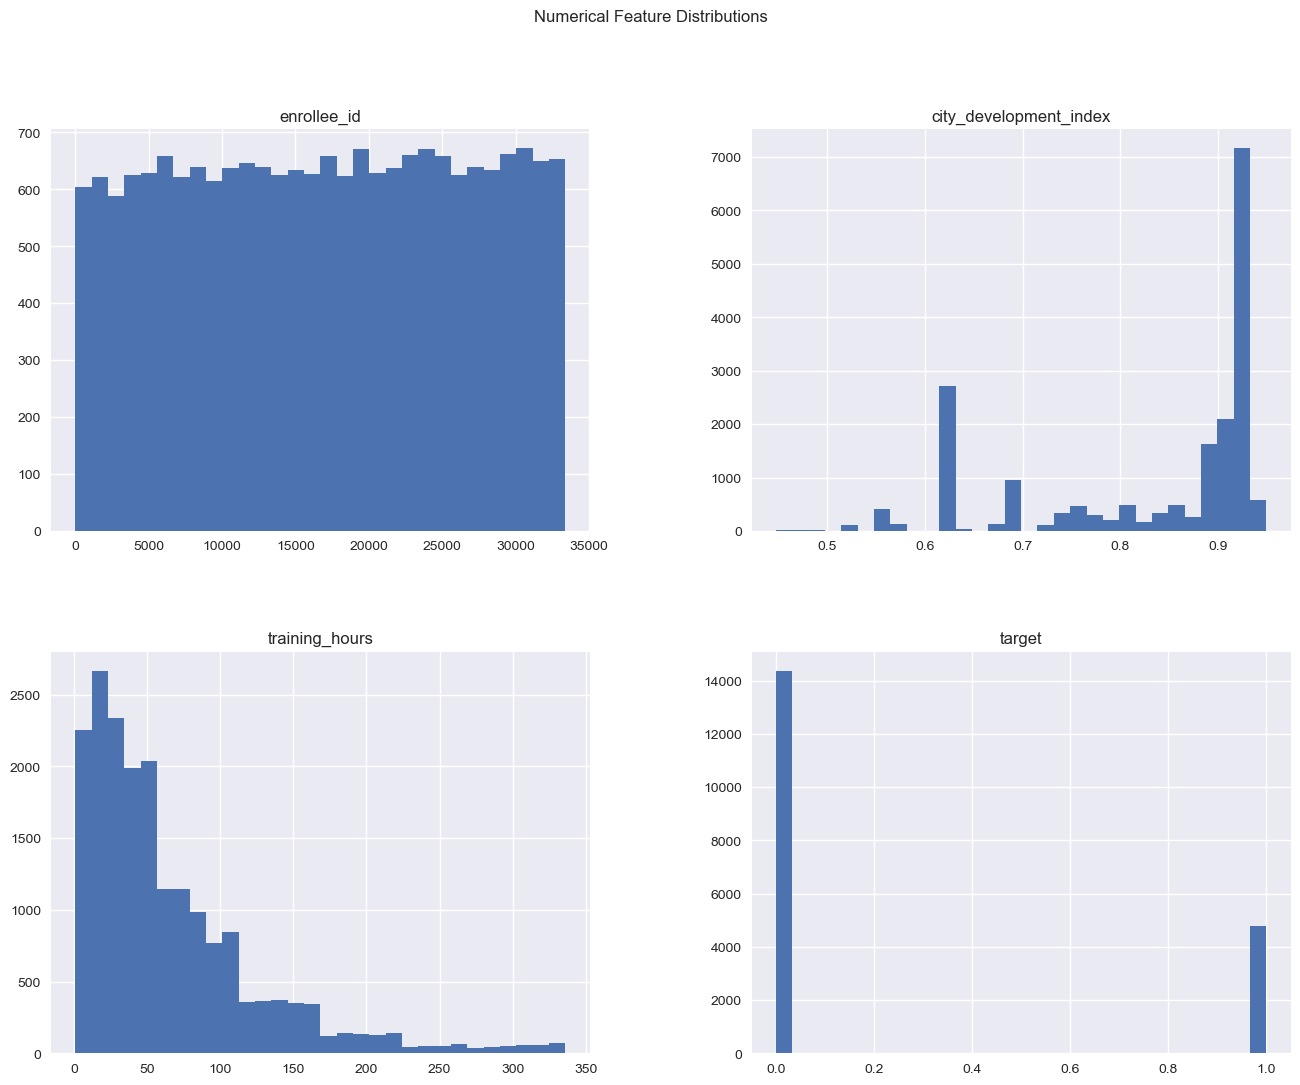

In [45]:
train_df[num_cols].hist(figsize=(16,12), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()


In [46]:
def detect_outliers(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = ((df[col] < Q1 - 1.5*IQR) | 
                         (df[col] > Q3 + 1.5*IQR)).sum()
    return pd.Series(outliers).sort_values(ascending=False)

detect_outliers(train_df, num_cols)


target                    4777
training_hours             984
city_development_index      17
enrollee_id                  0
dtype: int64

In [47]:
for col in cat_cols:
    print(f"\n{col}")
    print(train_df[col].value_counts().head())



city
city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
Name: count, dtype: int64

gender
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

relevent_experience
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

enrolled_university
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

education_level
education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

major_discipline
major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: count, dtype: int64

experience
experience
>20    3286
5      1430
4      1403
3      1354
6      1216
Name: count, dtype: int64

company_size
company_size
50-99     

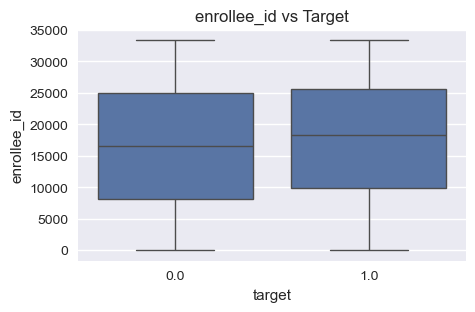

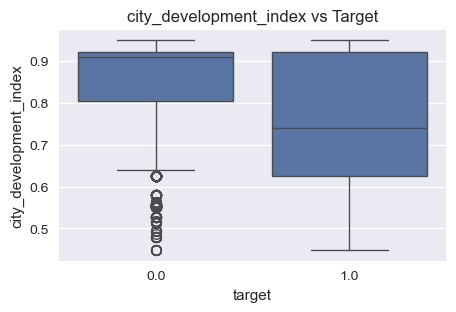

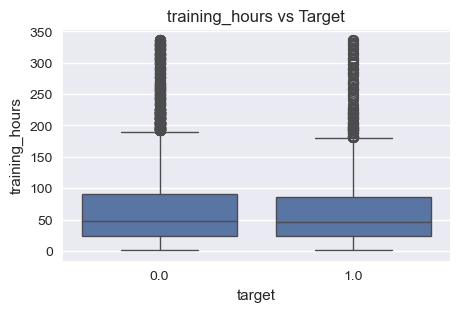

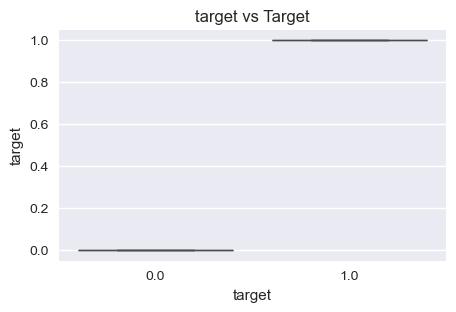

In [48]:
for col in num_cols[:5]:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='target', y=col, data=train_df)
    plt.title(f"{col} vs Target")
    plt.show()


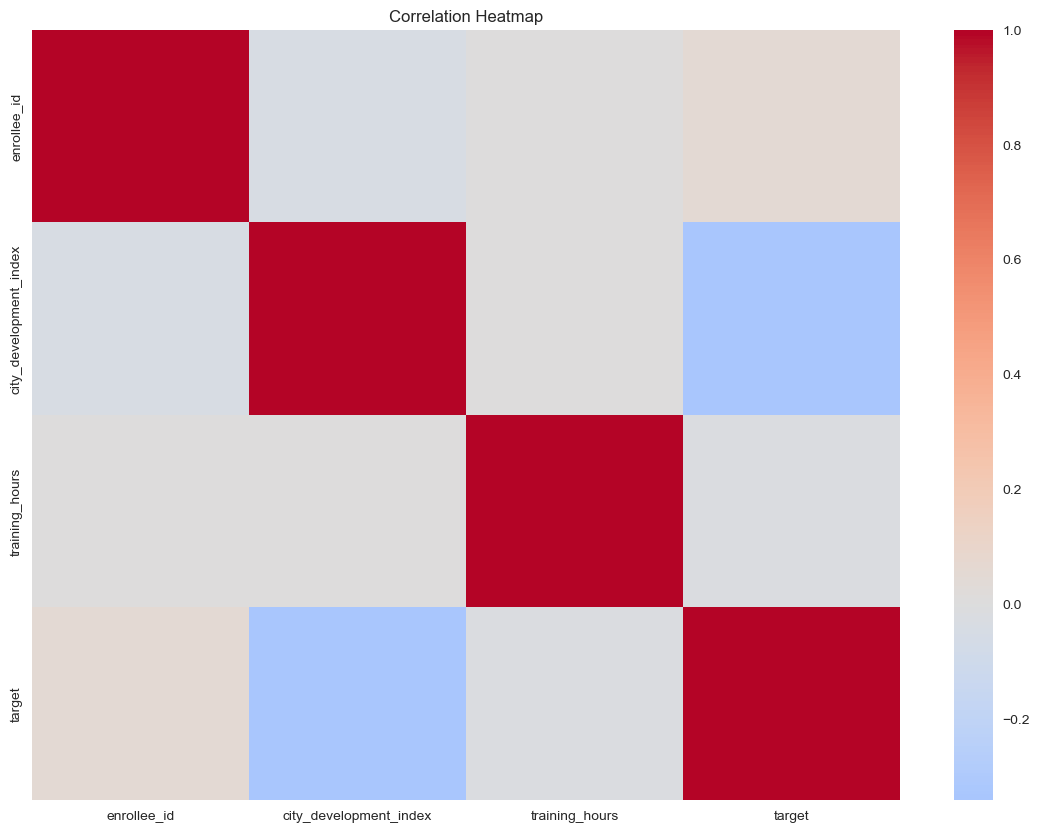

In [49]:
plt.figure(figsize=(14,10))
corr = train_df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


<span style="color:green"><h2 id="12-feature-encoding">12. Feature Encoding</h2></span>


In [50]:
from sklearn.preprocessing import LabelEncoder

cat_cols = train_df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col]  = le.transform(test_df[col])


<span style="color:green"><h2 id="13-feature–target-split">13. Feature–Target Split</h2></span>


In [51]:
X = train_df.drop('target', axis=1)
y = train_df['target']


<span style="color:green"><h2 id="14-train–validation-split">14. Train–Validation Split</h2></span>


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


<span style="color:green"><h2 id="15-model-evaluation-function">15. Model Evaluation Function</h2></span>


In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred   = model.predict(X_val)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

    print(f"\n===== {model_name} =====")
    print(classification_report(y_val, y_val_pred))

    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()


: 

<span style="color:green"><h2 id="16-model-training">16. Model Training</h2></span>


Logistic Regression


===== Logistic Regression =====
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85      2877
         1.0       0.53      0.13      0.20       955

    accuracy                           0.75      3832
   macro avg       0.65      0.54      0.53      3832
weighted avg       0.71      0.75      0.69      3832



C:\Users\starb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


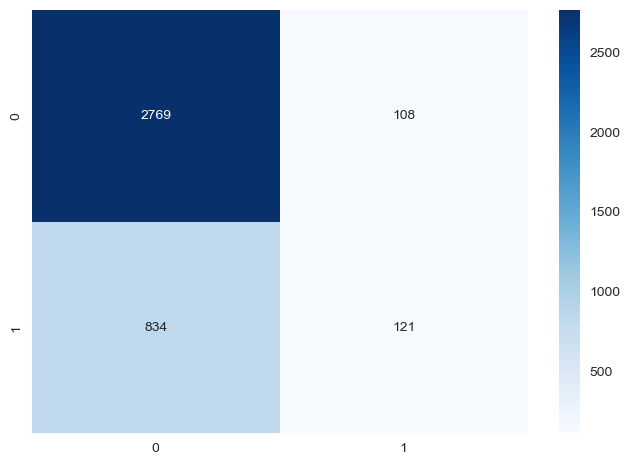

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr_metrics = evaluate_model(lr, X_train, y_train, X_val, y_val, "Logistic Regression")


Random Forest


===== Random Forest =====
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      2877
         1.0       0.57      0.49      0.53       955

    accuracy                           0.78      3832
   macro avg       0.70      0.68      0.69      3832
weighted avg       0.77      0.78      0.77      3832



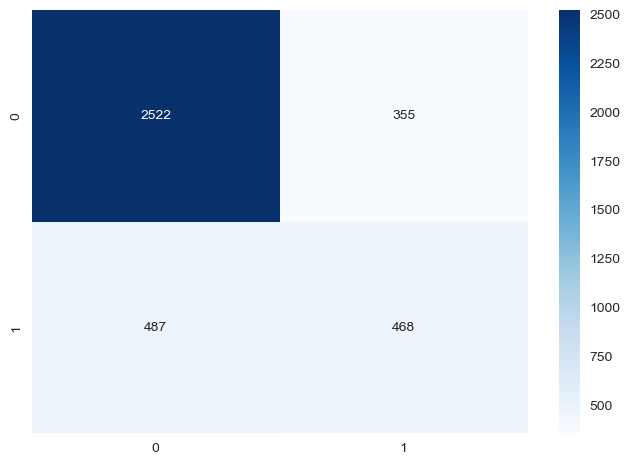

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_metrics = evaluate_model(rf, X_train, y_train, X_val, y_val, "Random Forest")


XGBoost


===== XGBoost =====
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      2877
         1.0       0.59      0.54      0.56       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.71      3832
weighted avg       0.79      0.79      0.79      3832



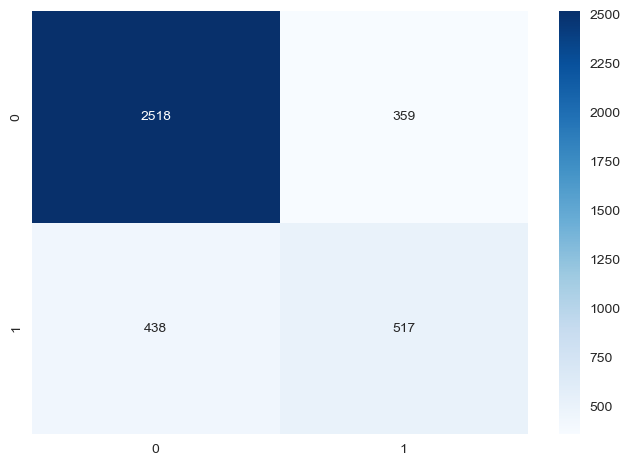

In [56]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_metrics = evaluate_model(xgb, X_train, y_train, X_val, y_val, "XGBoost")


LightGBM

[LightGBM] [Info] Number of positive: 3822, number of negative: 11504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 15326, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249380 -> initscore=-1.101921
[LightGBM] [Info] Start training from score -1.101921

===== LightGBM =====
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      2877
         1.0       0.60      0.60      0.60       955

    accuracy                           0.80      3832
   macro avg       0.73      0.73      0.73      3832
weighted avg       0.80      0.80      0.80      3832



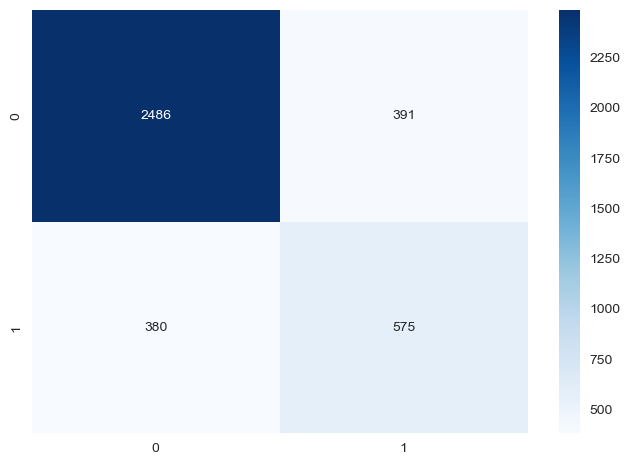

In [57]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

lgbm_metrics = evaluate_model(lgbm, X_train, y_train, X_val, y_val, "LightGBM")


<span style="color:green"><h2 id="17-model-comparison">17. Model Comparison</h2></span>


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def collect_metrics(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1-score": f1_score(y_val, y_pred),
        "ROC-AUC": roc_auc_score(y_val, y_proba)
    }


comparison table

In [59]:
results = pd.DataFrame([
    collect_metrics(lr, X_val, y_val, "Logistic Regression"),
    collect_metrics(rf, X_val, y_val, "Random Forest"),
    collect_metrics(xgb, X_val, y_val, "XGBoost"),
    collect_metrics(lgbm, X_val, y_val, "LightGBM")
])

results.sort_values(by="F1-score", ascending=False)


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
3,LightGBM,0.798800,0.595238,0.602094,0.598647,0.815644
2,XGBoost,0.792015,0.590183,0.541361,0.564719,0.810150
1,Random Forest,0.780271,0.568651,0.490052,0.526434,0.800562
0,Logistic Regression,0.754175,0.528384,0.126702,0.204392,0.711221


<span style="color:green"><h2 id="18-hyperparameter-tuning-xgboost">18. Hyperparameter Tuning (XGBoost)</h2></span>


Step 18.1 — DEFINE param_dist

In [60]:
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3, 0.5],
    "min_child_weight": [1, 3, 5]
}


Step 18.2 — NOW run RandomizedSearchCV

In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_random = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\starb\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:02:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [62]:
from sklearn.model_selection import RandomizedSearchCV

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_const...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=300, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1')

<span style="color:green"><h2 id="19-final-tuned-model-evaluation">19. Final Tuned Model Evaluation</h2></span>



===== XGBoost (Tuned) =====
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      2877
         1.0       0.59      0.63      0.61       955

    accuracy                           0.80      3832
   macro avg       0.73      0.74      0.74      3832
weighted avg       0.80      0.80      0.80      3832



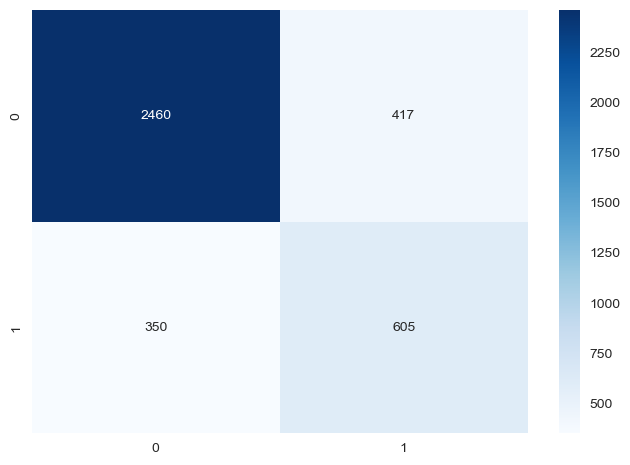

In [63]:
xgb_tuned = xgb_random.best_estimator_
xgb_tuned_metrics = evaluate_model(
    xgb_tuned, X_train, y_train, X_val, y_val, "XGBoost (Tuned)"
)


<span style="color:green"><h2 id="20-apply-smote-training-data-only">20. Applying SMOTE (Training Data Only)</h2></span>


In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_smote.value_counts())


Before SMOTE:
 target
0.0    11504
1.0     3822
Name: count, dtype: int64

After SMOTE:
 target
0.0    11504
1.0    11504
Name: count, dtype: int64


<span style="color:green"><h2 id="21-retrain-models-using-smote-data">21. Retrain Models Using SMOTE Data</h2></span>


In [65]:
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_train_smote, y_train_smote)

rf_smote = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_smote.fit(X_train_smote, y_train_smote)

xgb_smote = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb_smote.fit(X_train_smote, y_train_smote)


C:\Users\starb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

<span style="color:green"><h2 id="22-evaluate-smote-models-same-validation-set">22. Evaluate SMOTE Models (Same Validation Set)</h2></span>


In [66]:
results_smote = pd.DataFrame([
    collect_metrics(lr_smote, X_val, y_val, "Logistic Regression (SMOTE)"),
    collect_metrics(rf_smote, X_val, y_val, "Random Forest (SMOTE)"),
    collect_metrics(xgb_smote, X_val, y_val, "XGBoost (SMOTE)")
])

results_smote


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression (SMOTE),0.659969,0.382273,0.591623,0.464447,0.674096
1,Random Forest (SMOTE),0.762004,0.520188,0.580105,0.548515,0.785348
2,XGBoost (SMOTE),0.776618,0.546654,0.607330,0.575397,0.786573


<span style="color:green"><h2 id="23-compare-before-vs-after-smote">23. Compare Before vs After SMOTE</h2></span>


In [67]:
final_comparison = pd.concat([results, results_smote])
final_comparison.sort_values(by="F1-score", ascending=False)


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
3,LightGBM,0.798800,0.595238,0.602094,0.598647,0.815644
2,XGBoost (SMOTE),0.776618,0.546654,0.607330,0.575397,0.786573
2,XGBoost,0.792015,0.590183,0.541361,0.564719,0.810150
1,Random Forest (SMOTE),0.762004,0.520188,0.580105,0.548515,0.785348
1,Random Forest,0.780271,0.568651,0.490052,0.526434,0.800562
0,Logistic Regression (SMOTE),0.659969,0.382273,0.591623,0.464447,0.674096
0,Logistic Regression,0.754175,0.528384,0.126702,0.204392,0.711221


“SMOTE increased recall but reduced precision, therefore the non-SMOTE tuned XGBoost was retained as the final model.”

<span style="color:green"><h2 id="24-final-conclusion-">24. Final Conclusion </h2></span>




This project successfully developed an end-to-end machine learning solution to predict job-change likelihood among data scientists by following the complete machine learning lifecycle, including data exploration, preprocessing, feature encoding, model training, evaluation, and comparative analysis.

Multiple classification models—Logistic Regression, Random Forest, XGBoost, and LightGBM—were implemented and systematically evaluated. The results consistently showed that boosting-based models outperformed traditional models, highlighting their superior ability to capture complex, non-linear relationships commonly present in structured HR datasets.

### Handling Class Imbalance

The target variable exhibited class imbalance, which was addressed using stratified train–test splitting and robust evaluation metrics such as F1-score and ROC–AUC. These metrics were selected because accuracy alone is misleading in imbalanced classification problems.

An experimental SMOTE-based approach was also applied to improve learning for the minority class (employees likely to change jobs).

### Why the SMOTE Model Was Not Selected

Although SMOTE increased recall by identifying more potential job-changers, it significantly reduced precision, leading to a higher number of false-positive predictions. In a real-world HR setting, this trade-off is undesirable because:

- False positives trigger unnecessary retention actions
- HR resources may be wasted on employees not at actual risk
- Synthetic samples can distort the original data distribution and reduce model stability

Due to these limitations, the SMOTE-based model was not considered suitable for final deployment.

### Why XGBoost (Without SMOTE) Was Chosen as the Final Model

The tuned XGBoost model trained on the original data distribution demonstrated the most stable and reliable performance. It was selected because:

- It provided a balanced trade-off between precision and recall
- It achieved consistently high ROC–AUC and F1-scores
- It generalized well without relying on synthetic data
- It minimized the risk of overestimating job-change likelihood

### Why LightGBM Was Not Extended with SMOTE

Although LightGBM showed competitive performance, it did not outperform XGBoost in the non-SMOTE setting. Since XGBoost already achieved optimal results and SMOTE introduced instability, extending SMOTE to LightGBM would have added complexity without meaningful performance gains. Therefore, further SMOTE-based experimentation with LightGBM was intentionally avoided.

### Overall Outcome

This project demonstrates the effective application of machine learning techniques to employee retention prediction. The final non-SMOTE tuned XGBoost model provides a robust, interpretable, and production-ready solution that balances predictive performance with practical HR decision-making requirements. The workflow establishes a solid foundation for future enhancements and real-world deployment.
